# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)
Student Name and ID:Divya Sri Marvathu 1001834872 <-- Only this student will submit the assignment

Student Name and ID: Marcus Hawkins 1000250010 

Notes: When submitting, fill your name and ID in this cell. [1 point]

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions ( 2 Points)


Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

## Programming Assignment Details (25 Points)



For this assignment use Jupyter notebook, Panda, and scikit.

1) Load iris dataset from sklearn datasets. [1 points]


2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]


3) Select only 2 attributes for training and testing your model. [2 points]


4) Use Euclidean distance. [3 points]


5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]


6) Use comments to explain your code and variable names.[2 points]


7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]


8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

## Report (20 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:


1) Describe the Nearest Neighbors method, [5 points]


2) Explain what was your criteria for selecting the two attributes, [5 points]


3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[5 points]


4) Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## Canvas Submission (2 Points)

Step 5 : Submit your zipped folder containing PA#2_Classification_yourLastName (PA#2_Classification_yourLastName.zip) on Canvas

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [45]:
import pandas            as pd
import seaborn           as sns
import numpy             as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib        import markers

from pandas import DataFrame

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing

from sklearn.datasets        import load_iris
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier

#reference Links
#https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

<h6> 1) Load iris dataset from sklearn datasets. [1 points] <h6>

In [46]:
iris = datasets.load_iris()
X    = iris.data  
Y    = iris.target

<h6>2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]<h6>

In [47]:
# split the dataset into Training and Testing Data into 70% for training, and 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=1 )

<h6>3) Select only 2 attributes for training and testing your model. [2 points]<h6>

In [48]:
#Considered the Sepal length and Petal Width as attributes 1st and 4th columns
X_train_att= np.concatenate( (X_train[:, 0:1], X_train[:, 3:4]), axis = 1 )
X_test_att = np.concatenate( (X_test[:, 0:1],  X_test[:, 3:4]),  axis = 1 )

<h6>4) Use Euclidean distance. [3 points]

5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]

6) Use comments to explain your code and variable names.[2 points]

7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]

8) Plot the classifier in a 2D projection for all three different numbers.[6 points]   <h6>

Accuracy for KNN when k is 3 : 
0.9777777777777777


Confusion Matrix for KNN when k = 3
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
		 	 Classification Report 	 	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy for KNN when k is 9 : 
0.9333333333333333


Confusion Matrix for KNN when k = 9
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
		 	 Classification Report 	 	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94

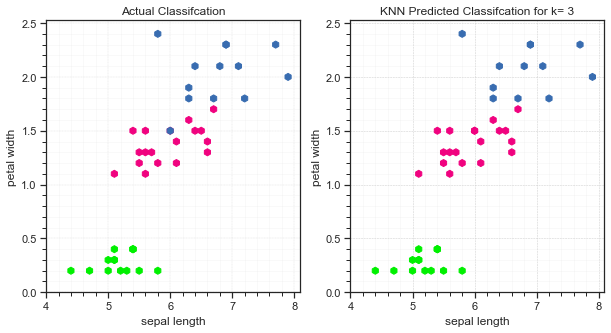

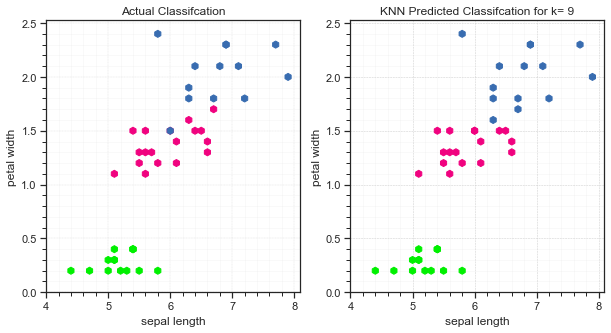

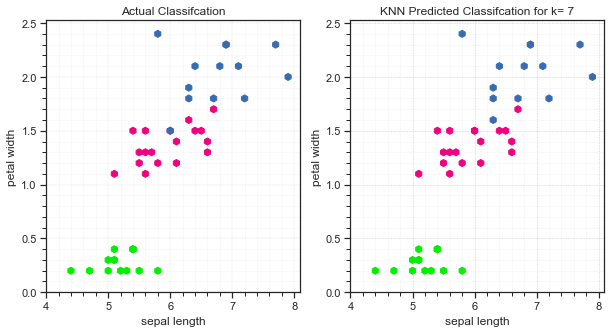

In [49]:
# cmap_points is for coloring points in scatter plot
cmap_points = ListedColormap( ['#00F000', '#f0027f', '#386cb0'] )

# Adjusting the data points on axes
x_ticks   = np.arange( 4, 8,   0.2 )
y_ticks   = np.arange( 0, 2.5, 0.1 ) 
neighbors = [3, 9, 7]
i         = 0

# loop to find KNN for different values of k - 3, 9, 27
while i < len(neighbors):  
    
    k=neighbors[i]
    # build model using KNeighborsClassifier with euclidean distance = minkowski when p=2
    knnmodel = KNeighborsClassifier( n_neighbors=k, p=2, metric='minkowski' )
    
    # fit training data into the model
    knnmodel.fit( X_train_att, Y_train )
    
    # predict the results using the testing data 
    predict_clfn = knnmodel.predict( X_test_att )
    
    # print Accuracy, Confusion Matrix and Classification Reprot based on predicted data
    acc = accuracy_score( Y_test,predict_clfn )
    
    print( "Accuracy for KNN when k is %i : "%k )
    print( acc                                  )
    print( "\n"                                 )

    print( "Confusion Matrix for KNN when k =", k   )
    print( confusion_matrix( Y_test, predict_clfn ) )
    
    print( "\t\t \t Classification Report \t \t"         )
    print( classification_report( Y_test, predict_clfn ) )
    
    i=i+1
    # to view the classification from actual to predicted data have choosen two plots
    fig, axes = plt.subplots(1,2)
    ax1       = axes[0]
    ax2       = axes[1]
    
    # Setting the size of figure
    plt.gcf().set_size_inches( ( 10, 5 ) )  
    
    # Visualization of the data using scatter plot for three different neighbours
    actual_figure=ax1.scatter( X_test_att[:, 0], X_test_att[:, 1], c=Y_test, cmap=cmap_points, marker="h",  s=50 )
    
    ax1.set( xlabel="sepal length", ylabel="petal width" )
    
    predicted_figure = ax2.scatter( X_test_att[:, 0], X_test_att[:, 1], c=predict_clfn, \
                                    cmap=cmap_points, marker="h", s=50                    )
    
    ax2.set      ( xlabel="sepal length", ylabel="petal width" )
    ax1.set_title( "Actual Classifcation"                      )
    ax2.set_title( "KNN Predicted Classifcation for k= %i" %k  )
    
    # Adjusting the grid scale for both the plots
    ax1.grid       ( linestyle='--', linewidth=0.3 )
    ax1.set_xticks ( x_ticks, minor=True           )
    ax1.set_yticks ( y_ticks, minor=True           )
    
    ax1.grid       ( which='minor',  alpha=0.1     )
    ax2.grid       ( linestyle='--', linewidth=0.5 )
    ax2.set_xticks ( x_ticks,        minor=True    )
    ax2.set_yticks ( y_ticks,        minor=True    )
    ax2.grid       (which='minor',   alpha=0.1     )
    

Report (20 Points)

1) Describe the Nearest Neighbors method, [5 points]

K-Nearest Neighbors is used to classify the data based on classification of its neighbors.
KNN accumulates all the available data and classifies new data based on similarity measure.
K is the number of neighbors to consider in classifying the data. The main factor for KNN algorithm is to choose the K value. K should not be too small as it may lead to misclassification, or it should not be too large as outliers may be included when a large number is considered.
KNN is better where the data is free from noise or the class is having a smaller variety of labels.
KNN is used in many online shopping sites where frequently bought together products or similar products will be displayed when we try to view any product.

Algorithm Implementation:
KNN uses the entire training set data and when prediction for testing data is required, KNN searches the entire training set data for k similar instances and the data with the most similar instances are finally returned as a prediction. The similarity is measured by using the distance using methods like Euclidean, Manhattan, Minkowski or Hamming distance. Once the distance is found, data is sorted based on increasing order of the distance. The first k rows are selected, and the classification is predicted based on the most frequent class. 

Advantages:
KNN is very simple, easy to understand and straightforward to implement even for multiple classes.
KNN can be used for both Classification and regression problems.

Disadvantages:
KNN does not learn, but memorizes the data from the training set, and thus it is called a lazy learning algorithm.
If the data set is very large, the prediction of the data will be slow as it needs to calculate the distance for the entire training data set and predict the classification.


2) Explain what was your criteria for selecting the two attributes, [5 points]

Sepal Length and Petal Width were the attributes selected to illustrate the KNN algorithm as the distribution was comparatively distinguishable when compared to other attributes. The blue color represents the Setosa flower which is was easily separable from the other two flowers distribution.
The other two flowers, Versicolor and Virginica, are slightly close to each other but considering the Sepal Length and Petal Width attributes, it is easily separable when compared to other distributions. Due to this reason we have concluded Sepal Length and Petal Width is one of the best pairs of attributes to classify iris flowers to their respective classes.


# 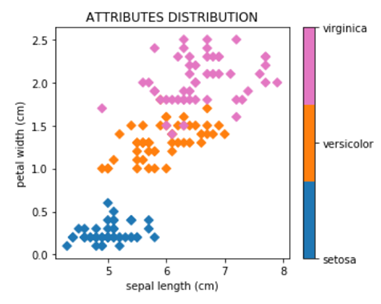

# 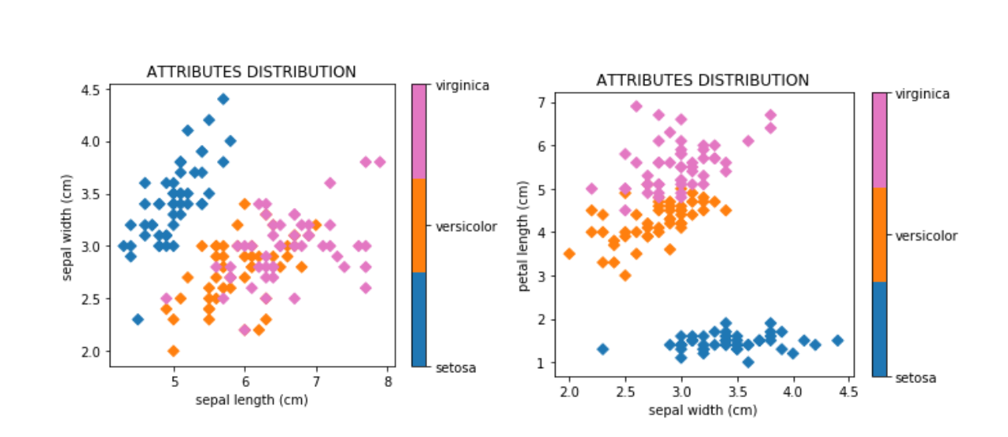

# 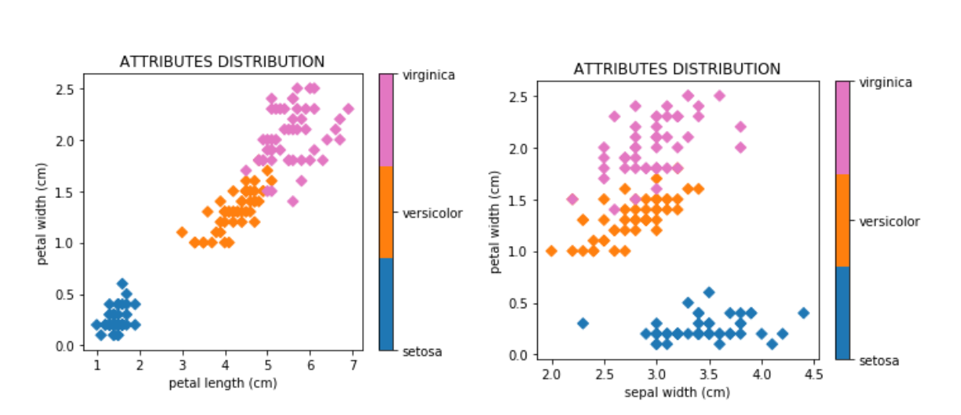

3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[4 points]

We have chosen k values as 3, 9, and 27. We can observe differences from the predicted values distribution to the actual distribution for Versicolor and Virginica classes.


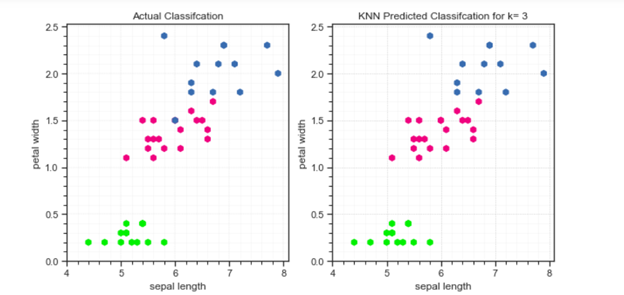

# 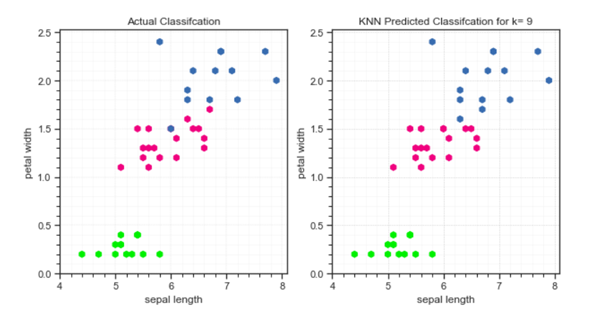

# 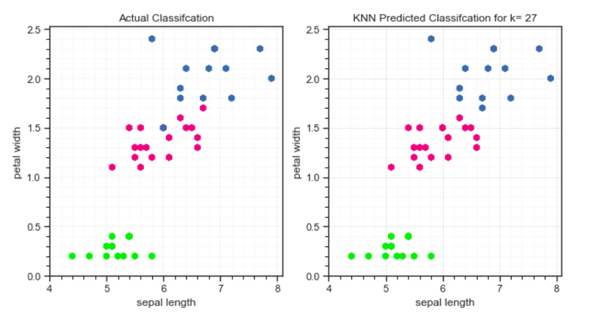

4) Interprete and compare the results.[5 points]

For k=3, the accuracy is 0.97, for k=9 the accuracy is 0.93 and for k=27 the accuracy is 0.95. As k increases accuracy decreased until k=17, increased at k=18 until k=28 and then decreased at k=29.

Confusion Matrix, Classification Report and Accuracy are different for different k.

For k=3, 
1 virginica flower was predicted as versicolor
For k=9
1 virginica was predicted as versicolor
2 versicolors were predicted as virginica
For k=27
1 virginica was predicted as versicolor
1 versicolor was predicted as virginica


Accuracy when k is 3 : 0.9777777777777777

Confusion Matrix for KNN when k = 3

                        [[14  0  0]

                         [ 0 18  0]
 
                         [ 0  1 12]]
 
 
		 	 Classification Report 	 	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
    macro avg       0.98      0.97     0.98        45
    weighted avg    0.98      0.98     0.98        45



Accuracy when k is 9 : 0.9333333333333333

Confusion Matrix for KNN when k = 9

                            [[14  0  0]

                             [ 0 16  2]
 
                             [ 0  1 12]]
 
		 	        Classification Report 	 	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.89      0.91        18
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
    macro avg       0.93      0.94     0.93        45
    weighted avg    0.94      0.93     0.93        45



Accuracy when k is 27 : 0.9555555555555556

Confusion Matrix for KNN when k = 27

                            [[14  0  0]

                             [ 0 17  1]
 
                             [ 0  1 12]]
 
		 	        Classification Report 	 	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
    macro avg       0.96      0.96     0.96        45
    weighted avg    0.96      0.96     0.96        45
